In [1]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Ranjit M\Desktop\Fraud_Transaction_Detection.csv")

<IPython.core.display.Javascript object>

In [3]:
df.shape

(1754155, 10)

In [4]:
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [5]:
df.drop(columns=['Unnamed: 0','TRANSACTION_ID','TX_DATETIME','CUSTOMER_ID','TERMINAL_ID'],axis=1,inplace=True)

In [6]:
#lets look the dtypes of thr training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TX_AMOUNT          float64
 1   TX_TIME_SECONDS    int64  
 2   TX_TIME_DAYS       int64  
 3   TX_FRAUD           int64  
 4   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(4)
memory usage: 66.9 MB


In [7]:
#lets look for the nan values
df.isnull().values.any()

False

<IPython.core.display.Javascript object>

<AxesSubplot:>

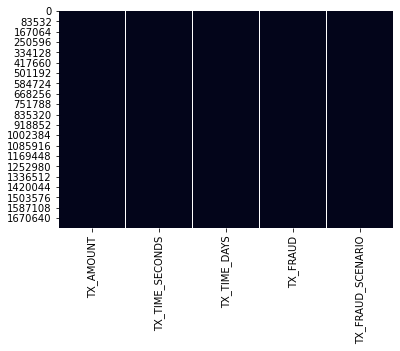

In [8]:
#we can see from the above result that we don't have any kind of null values  in our data set
#lets confirm with the hatmap
sns.heatmap(df.isnull(),cbar=False)

In [9]:
#we can see from above plot that we don't have any kind of NaN values 

In [10]:
#lets see for the class
df.TX_FRAUD	.value_counts()

0    1739474
1      14681
Name: TX_FRAUD, dtype: int64

we can see here we have a inbanaced daatset so we have to banched that 

In [11]:
for i in df.columns:
    val=df[i].value_counts()
    print(val)
    print('\n')

9.52      295
7.52      292
12.50     290
8.61      289
10.22     289
         ... 
221.19      1
180.07      1
466.95      1
530.75      1
358.20      1
Name: TX_AMOUNT, Length: 24287, dtype: int64


7992619     6
10418928    6
11351499    5
9101662     5
9986862     5
           ..
5467024     1
5467017     1
5467015     1
5466980     1
15811197    1
Name: TX_TIME_SECONDS, Length: 1635076, dtype: int64


90     9789
116    9787
95     9784
32     9771
45     9767
       ... 
60     9422
127    9417
52     9399
53     9376
150    9285
Name: TX_TIME_DAYS, Length: 183, dtype: int64


0    1739474
1      14681
Name: TX_FRAUD, dtype: int64


0    1739474
2       9077
3       4631
1        973
Name: TX_FRAUD_SCENARIO, dtype: int64




In [12]:
#lets see for the  statistical analysis
df.describe()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,5.363230e+01,7.903234e+06,9.097260e+01,8.369272e-03,1.882388e-02
std,4.232649e+01,4.565172e+06,5.283709e+01,9.110012e-02,2.113263e-01
min,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101000e+01,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00
50%,4.464000e+01,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00
75%,7.695000e+01,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00
max,2.628000e+03,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00


In [13]:
def correlation_coefficient(x, y):
    # calculate the mean of the x and y
    x_mean = statistic_analysis(x)[0]
    y_mean = statistic_analysis(y)[0]
    # calculate the standard deviation of the x and y
    x_std = statistic_analysis(x)[1]
    y_std = statistic_analysis(y)[1]
    # calculate the correlation coefficient
    numerator = 0
    for i in range(len(x)):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator = x_std * y_std
    return numerator / denominator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

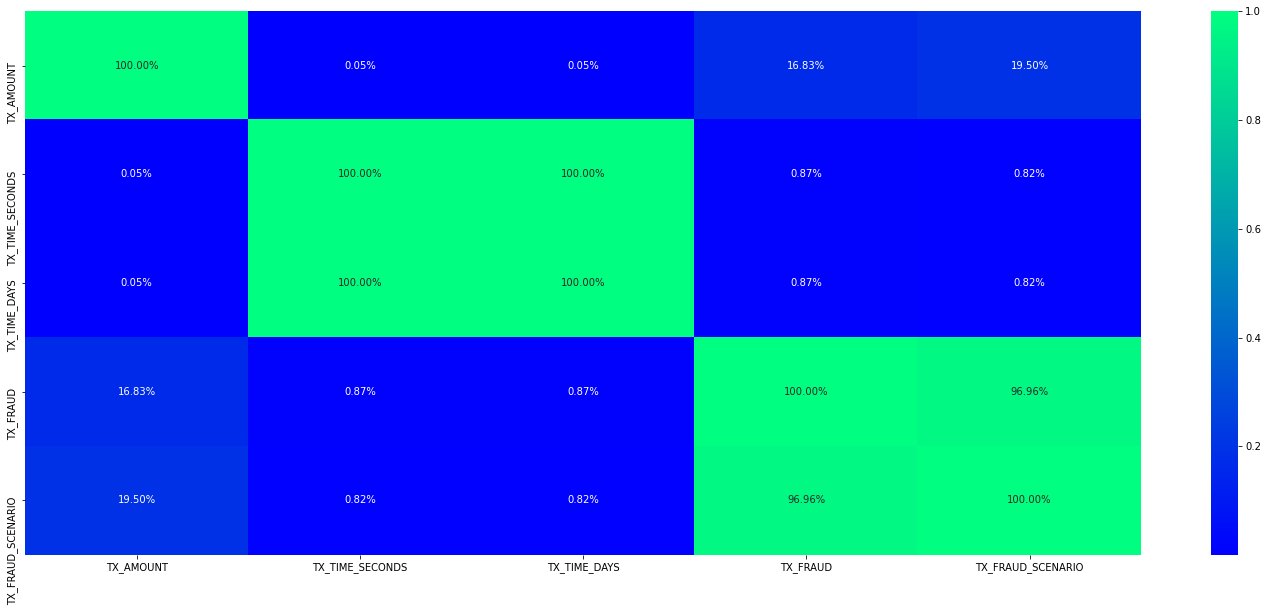

In [14]:
plt.figure(figsize=[25,10])
sns.heatmap(df.corr(),cmap='winter',fmt='.2%',annot=True)

In [15]:
def corr_with_target(df):
    Target="TX_FRAUD"#Y label
    plt.figure(figsize=[12,6])
    df.drop(Target,axis=1).corrwith(df[Target]).plot(kind='bar',grid=True,color='red')
    plt.xticks(rotation=90)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

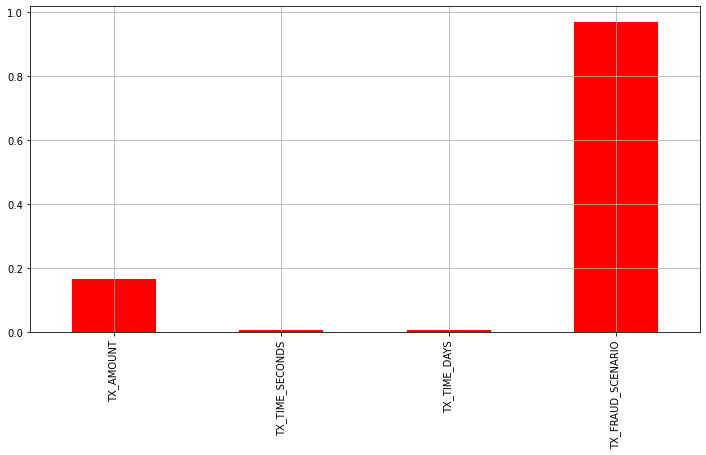

In [16]:
corr_with_target(df)

In [17]:
#lets take a sample dataset becuze here we have a large data set that so 
df_sample=df.sample(n=25000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

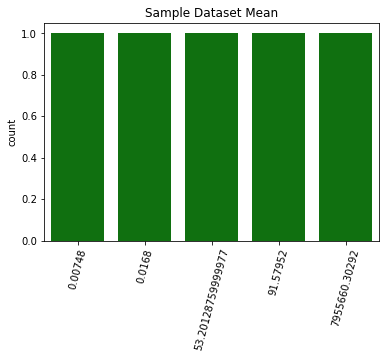

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

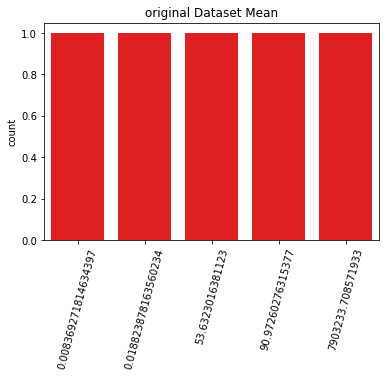

In [18]:
sample_mean=df_sample.mean()
org_mean=df.mean()
sns.countplot(x=sample_mean,color='g')
plt.xticks(rotation=75)
plt.title("Sample Dataset Mean")
plt.show()

sns.countplot(x=org_mean,color='r')
plt.xticks(rotation=75)
plt.title("original Dataset Mean")
plt.show()

In [19]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 345569 to 1434893
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TX_AMOUNT          25000 non-null  float64
 1   TX_TIME_SECONDS    25000 non-null  int64  
 2   TX_TIME_DAYS       25000 non-null  int64  
 3   TX_FRAUD           25000 non-null  int64  
 4   TX_FRAUD_SCENARIO  25000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.1 MB


In [20]:
def Uni_var(df,col):
    df[col].hist()
    m=df[col].mean()
    plt.axvline(m,linewidth=4,color='green',label=('mean %0.2f'%m))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

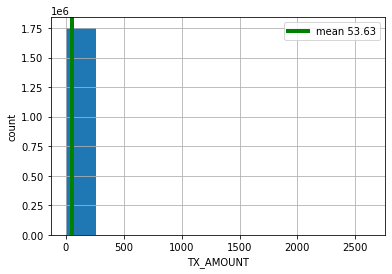

TX_AMOUNT 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

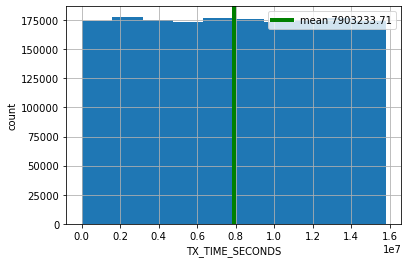

TX_TIME_SECONDS 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

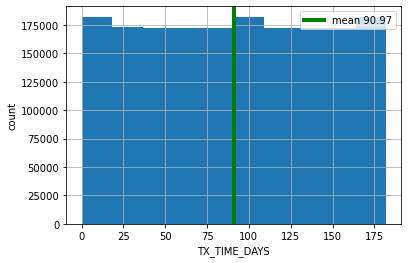

TX_TIME_DAYS 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

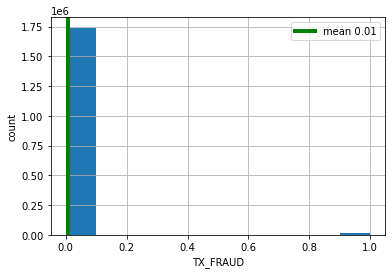

TX_FRAUD 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

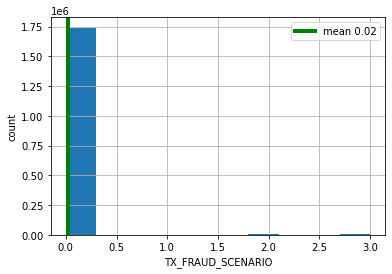

TX_FRAUD_SCENARIO 




In [21]:
for i in df_sample.columns:
    Uni_var(df,i)
    plt.show()
    print(i,"\n\n")

In [22]:
#Make a function for bar plot
def  count(p):
    plt.figure(figsize=[22,6])
    sns.jointplot(x=p,y="TX_FRAUD",data=df_sample,color='red')
    plt.xlabel(p)
    plt.ylabel("TX_FRAUD")
    plt.xticks(rotation=75)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1584x432 with 0 Axes>

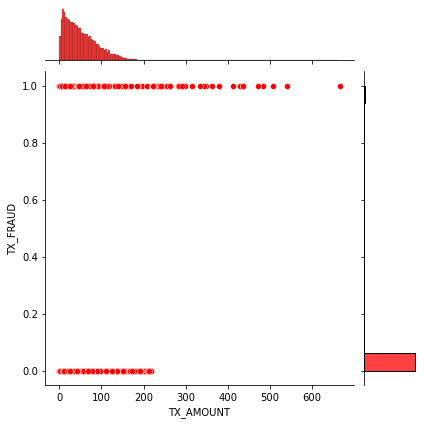

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1584x432 with 0 Axes>

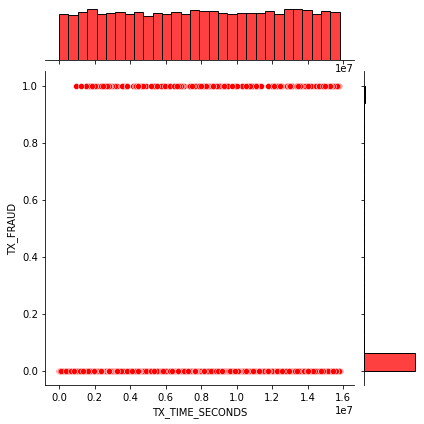

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1584x432 with 0 Axes>

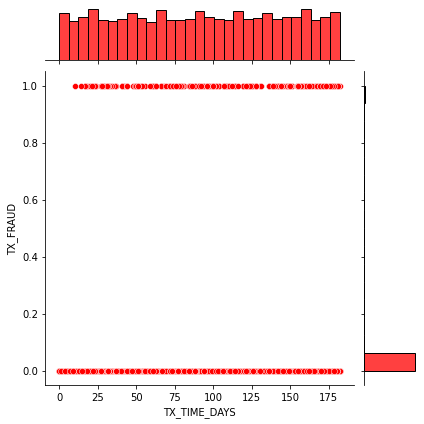

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1584x432 with 0 Axes>

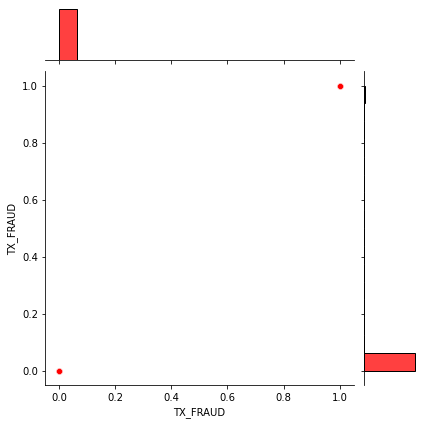

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1584x432 with 0 Axes>

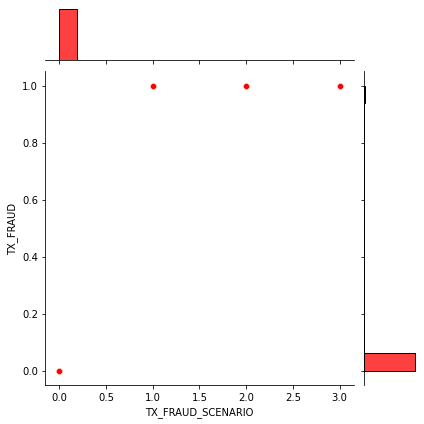

In [23]:
for i in df_sample.columns:
    count(i)
    print('\n')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

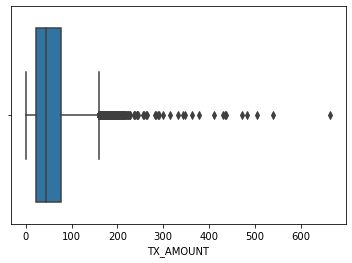

TX_AMOUNT 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

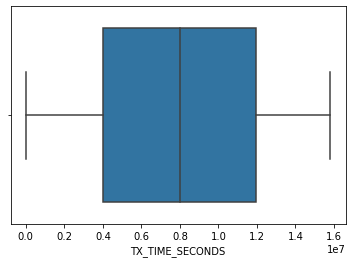

TX_TIME_SECONDS 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

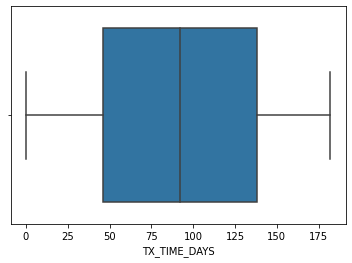

TX_TIME_DAYS 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

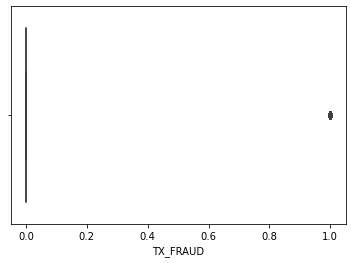

TX_FRAUD 




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

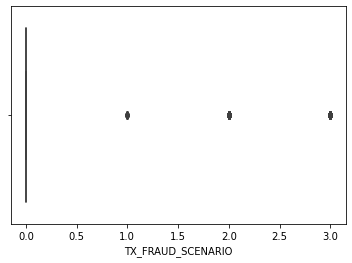

TX_FRAUD_SCENARIO 




In [24]:
# Checking the outliers
for i in df_sample.columns:
    sns.boxplot(df_sample[i])
    plt.show()
    print(i,'\n''\n')

In [25]:

df2=df_sample.copy()

In [26]:
#lets split as input and Out Put Data
#lets split the data in input and output
X=df2.drop(columns=['TX_FRAUD'],axis=1)
Y=df2[['TX_FRAUD']]
Y.value_counts()

TX_FRAUD
0           24813
1             187
dtype: int64

In [27]:
#from the Above statment we can see that we have a inbalanced dataset 
#lets Balanced it
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

TX_FRAUD
0           24813
1           24813
dtype: int64

In [28]:
#now we can see that our data set is scaled 

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mn=MinMaxScaler()
X=mn.fit_transform(X_sm)
x=pd.DataFrame(X,columns=X_sm.columns)

<IPython.core.display.Javascript object>

In [31]:
x.head()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO
0,0.058948,0.196608,0.192308,0.0
1,0.128603,0.505606,0.505495,0.0
2,0.006857,0.985705,0.989011,0.0
3,0.056858,0.198163,0.197802,0.0
4,0.088543,0.423467,0.423077,0.0


In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [33]:
y=y_sm
x.shape

(49626, 4)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
#In this data set we know that out target variable Label is catagorical so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_curve,auc
from sklearn.model_selection import train_test_split
final_random_state=[]#results will be append 
Highest_acc=[]#results will be append
clf_f=[]
def max_acc(clf,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_prd=clf.predict(x_test)
        rc=f1_score(y_test,y_prd)
        if rc>max_acc:
            max_acc=rc
            final_r=r
    final_random_state.append(final_r)
    clf_f.append(clf)
    Highest_acc.append(max_acc*100)
    print("max accuracy_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc)


In [35]:
from sklearn.model_selection import learning_curve
def lnc(model,g):#model=Regressor / classifier aalgorithms ,g= Best Random State no
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=g,test_size=0.20)
    lc=learning_curve(model,x_train,y_train,cv=10)
    size=lc[0]
    train_score=[lc[1][i].mean() for i in range (0,5)]
    test_score=[lc[2][i].mean() for i in range (0,5)]
    fig=plt.figure(figsize=(12,8))
    plt.plot(size,train_score,color="red")
    plt.plot(size,test_score,color="green")

In [36]:
lg= LogisticRegression()
max_acc(lg,x,y)

max accuracy_ score coressponding to ♣♣→ 42 is♣♣ 1.0


In [37]:
Bais=[]
var=[]
def bais_var(clf,x,y,z):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=z,test_size=0.20,stratify=y)
    clf.fit(x_train,y_train)
    trn_scr=clf.score(x_train,y_train)
    bais=1-trn_scr
    Bais.append(bais)
    test=clf.score(x_test,y_test)
    variance=1-test
    var.append(variance)
    print("Bais →",bais,"\n","Variance →",variance)

In [38]:
bais_var(lg,x,y,42)

Bais → 0.0 
 Variance → 0.0


In [39]:
#cross validataion 
from sklearn.model_selection import cross_val_score   
cvs=[]
def cross(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="f1")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print(c.mean())
    print("******************************************************")
    cvs.append(c.mean())
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())

In [40]:
cross(lg,x,y)

mean accuracy score for  LogisticRegression() 1.0
Standard deviation  in accuracy score for  LogisticRegression() 0.0
1.0
******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 1.0


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve


def PLT(md,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=f1_score(y_test,pre,average='macro')
    print(acc*100)
    cm=confusion_matrix(y_test,pre)
    log_fpr, log_tpr, log_threshold = roc_curve(y_test, pre)
    print()
    print()
    sns.heatmap(cm,annot=True)
    plt.show()
    def logistic_roc_curve(log_fpr, log_tpr):
        plt.figure(figsize = (10, 8))
        plt.title('Logistic Regression ROC Curve', fontsize =16)
        plt.plot(log_fpr, log_tpr, 'b-', linewidth =2)
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('False Positive Rate', fontsize = 16)
        plt.ylabel('True Positive Rate ', fontsize =16)
        plt.axis([-0.01, 1, 0, 1])
    logistic_roc_curve(log_fpr, log_tpr)
    print('log_threshold',log_threshold)

    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

100.0




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

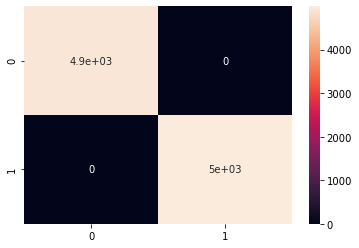

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

log_threshold [2 1 0]



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4933
           1       1.00      1.00      1.00      4993

    accuracy                           1.00      9926
   macro avg       1.00      1.00      1.00      9926
weighted avg       1.00      1.00      1.00      9926
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


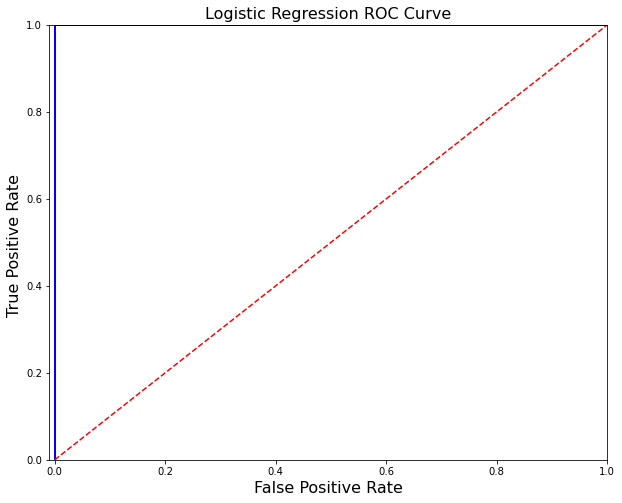

In [42]:
PLT(lg,x,y,42)

In [43]:
#lets make a pipe leine
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
class scaler(BaseEstimator):
    def __init__(self):
        pass
    def fit(self,documents,y=None):
        return self
    def transform(self,x_dataset):
        X=mn.fit_transform(x_dataset)
        x=pd.DataFrame(X,columns=x_dataset.columns)
        return x

In [44]:
model_pipeline=Pipeline(steps=[('min_max_Scaler',scaler()),('LogisticRegression',LogisticRegression())])

In [45]:
model_pipeline

Pipeline(steps=[('min_max_Scaler', scaler()),
                ('LogisticRegression', LogisticRegression())])

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20,stratify=y)

In [47]:
final_model=model_pipeline.fit(x_train,y_train)

<IPython.core.display.Javascript object>

In [48]:
final_model.predict(x_test)

<IPython.core.display.Javascript object>

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
import joblib
joblib.dump(final_model,'Fraud_txn.pkl')

['Fraud_txn.pkl']

In [50]:
#lets split as input and Out Put Data
#lets split the data in input and output
X_org=df.drop(columns=['TX_FRAUD'],axis=1)
Y_org=df[['TX_FRAUD']]
print('Befor Scaling')
print(Y_org.value_counts())

X_sm_org, y_sm_org = smote.fit_resample(X_org, Y_org)
print("After Scaling")
print(y_sm_org.value_counts())



Befor Scaling
TX_FRAUD
0           1739474
1             14681
dtype: int64
After Scaling
TX_FRAUD
0           1739474
1           1739474
dtype: int64


In [51]:
mn=MinMaxScaler()
X1=mn.fit_transform(X_sm_org)
x2=pd.DataFrame(X1,columns=X_sm_org.columns)

<IPython.core.display.Javascript object>

In [52]:
y_sm_org.shape

(3478948, 1)

In [53]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x2,y_sm_org,random_state=42,test_size=0.20,stratify=y_sm_org)

In [54]:
bais_var(lg,x2,y_sm_org,42)

Bais → 0.0 
 Variance → 0.0


In [55]:
model=joblib.load('Fraud_txn.pkl')

In [56]:
predict=model.predict(x1_test)
predict

<IPython.core.display.Javascript object>

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [57]:
df_result=pd.DataFrame(predict)

<IPython.core.display.Javascript object>

In [58]:
df_result.to_csv("Final_result.csv")
df_result.shape

(695790, 1)

# Thank You

In [61]:
model1=Pipeline(steps=[('min_max_Scaler',MinMaxScaler()),('LogisticRegression',LogisticRegression())])

In [62]:
model1

Pipeline(steps=[('min_max_Scaler', MinMaxScaler()),
                ('LogisticRegression', LogisticRegression())])

In [65]:
final_model01=model1.fit(x_train,y_train)

In [66]:
joblib.dump(final_model01,'Fraud_txn_final.pkl')

['Fraud_txn_final.pkl']